In [1]:
%pylab inline
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


# Shape tensor definition: 

\begin{equation}
S_{i,j} = \dfrac{\sum_{k} m_k (r_{k})_i (r_{k})_j} {\sum_{k} m_k w(r)_k}
\end{equation}
Where $w(r)$ is the weight function defined as:

\begin{equation}
w(r) = \dfrac{1}{r_{ell}^2}
\end{equation}

Where the elliptical radius $r_{ell}$ is defined as:

\begin{equation}
r_{ell} = \sqrt{x_{ell}^2 + \dfrac{y_{ell}^2}{(b/a)^2} + \dfrac{z_{ell}^2}{(c/a)^2}}
\end{equation}

Where the $c \leq b \leq a$

For our purporses all of the particles have the same mass then the shape tensor can be expressed as:

\begin{equation}
S_{i,j} = \dfrac{\sum_{k}  (r_{k})_i (r_{k})_j} {\sum_{k}  w(r_{ell})_k}
\end{equation}



## Iterative process

1. Define a spherical shell of radius 1 kpc at a given radius from the center.
2. Compute $S_{i,j}$ for the particles inside the spherical shell
3. Compute the axis length and orientation
4. Make an ellipsoidal shell deformed with the previous axis length
5. 

In [63]:
def shells(x, y, z, width, r, q, s):
    r_shell = np.sqrt(x**2.0 +y**2.0/q**2.0 +  z**2.0/s**2.0)
    index = np.where((r_shell<r) & (r_shell>r-width))[0]
    x_shell = x_sph[index]
    y_shell = y_sph[index]
    z_shell = z_sph[index]
    return x_shell, y_shell, z_shell

In [74]:
#Function that computes the Shape tensor
def shape_tensor(x, y, z):
    N = len(x)
    XYZ = np.array([x, y, z])
    shape_T = np.zeros([3, 3])
    for i in range(3):
        for j in range(3):
            XX = np.zeros(N)
            for n in range(N):
                XX[n] = XYZ[i,n] * XYZ[j,n]
            shape_T[i][j] = sum(XX) / N
    return shape_T        

# Computing the axis ratios using the Shape Tensor
def axis_ratios(shape_T):
    eival, evec = eig(shape_T)
    oeival = sort(eival)
    #print oeival
    a = oeival[2]
    b = oeival[1]
    c = oeival[0]
    s = np.sqrt(c/a)
    q = np.sqrt(b/a)
    return evec, s, q

#
def rotation(X, Y, Z, rot_matrix):
    coordiantes = np.array([X, Y, Z])
    rot_coordinates = dot(rot_matrix, coordiantes)
    return rot_coordinates[0], rot_coordinates[1], rot_coordinates[2]
 
# Selecting shells that 
def reshape(x, y, z, r, dr, tol):
    s_i = 1.0
    q_i = 1.0
    x_shell, y_shell, z_shell = shells(x, y, z, dr, r, s_i, q_i)
    s_tensor = shape_tensor(x_shell, y_shell, z_shell)
    rot_i, s, q = axis_ratios(s_tensor)
    t = 0
    #scatter(x_shell, y_shell, alpha=0.4, c='r')
    while ((abs(s-s_i)>tol) & (abs(q-q_i)>tol)):
        t +=1
        s_i, q_i = s, q
        x_shell, y_shell, z_shell = shells(x, y, z, dr, r, s_i, q_i)
        s_tensor = shape_tensor(x_shell, y_shell, z_shell)
        rot, s, q = axis_ratios(s_tensor)
    scatter(x_shell, y_shell, s=15, alpha=0.3)
    print s, q
    return s, q

In [75]:
# Function that generates an ellipsoid -> this is wrong!!!
def ellipsoid(N, a, b, c, Theta):
    phi = random.rand(N) * 2*pi
    theta = random.rand(N) * 2 - 1
    R = random.rand(N)
    X = a*R**(1/3.0) * sin(phi) * sin(arccos(theta))
    Y = b*R**(1/3.0) * cos(phi) * sin(arccos(theta))
    Z = c*R**(1/3.0) * cos(arccos(theta))
    X_rot = X*cos(Theta) - Y*sin(Theta)
    Y_rot = X*sin(Theta) + Y*cos(Theta)
    print 'q =',b/a
    print 's =',c/a
    return X, Y, Z

In [76]:
x_sph1, y_sph1, z_sph1 = ellipsoid(10000, 1.5, 1, 1, 1.0)
x_sph2, y_sph2, z_sph2 = ellipsoid(10000, 2.5, 2.0, 2.0, 1.0)
x_sph = np.concatenate((x_sph1, x_sph2))
y_sph = np.concatenate((y_sph1, y_sph2))
z_sph = np.concatenate((z_sph1, z_sph2))

D = np.array([x_sph, y_sph, z_sph])

q = 0.666666666667
s = 0.666666666667
q = 0.8
s = 0.8


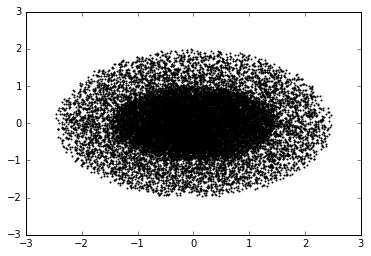

In [77]:
scatter(x_sph, y_sph, s=1)

In [78]:
data = np.loadtxt('ellipse.dat')

0.63342815523 0.672269198533


(0.6334281552295119, 0.6722691985325151)

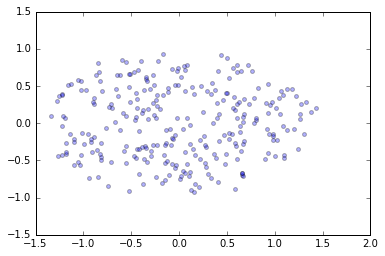

In [79]:
reshape(data[:,0], data[:,1], data[:,2], 1.9, 0.1, 1E-2)

0.981946118887 0.990508840728


(-1.0, 1.0, -1.0, 1.0)

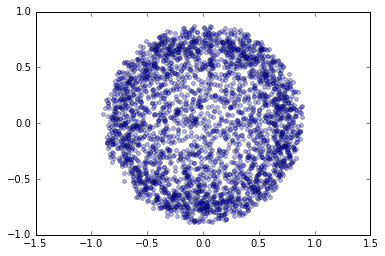

In [80]:
reshape(x_sph, y_sph, z_sph, 0.9, 0.2, 1E-2)
axis('equal')

0.940953592505 0.96904023043
0.959905265662 0.996798574448
0.505294477043 0.55752459137
0.72227531045 0.759824606858
0.904420478334 0.974651375865
0.544363038602 0.549146685107


(-3.0, 3.0, -3.0, 3.0)

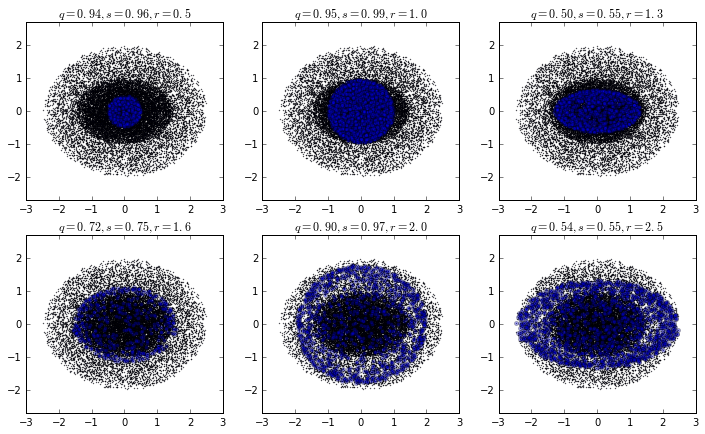

In [58]:
figure(figsize=(12, 7))
subplot(2, 3, 1)
title('$q=0.94, s=0.96, r=0.5$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 0.5, 0.1, 1E-3)
axis('equal')
subplot(2, 3, 2)
title('$q=0.95, s=0.99, r=1.0$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 1.0, 0.1, 1E-3)
axis('equal')
subplot(2, 3, 3)
title('$q=0.50, s=0.55, r=1.3$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 1.3, 0.1, 1E-3)
axis('equal')
subplot(2, 3, 4)
title('$q=0.72, s=0.75, r=1.6$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 1.6, 0.1, 1E-3)
axis('equal')
subplot(2, 3, 5)
title('$q=0.90, s=0.97, r=2.0$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 2.0, 0.1, 1E-3)
axis('equal')
subplot(2, 3, 6)
title('$q=0.54, s=0.55, r=2.5$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 2.5, 0.3, 1E-3)
axis('equal')



0.974253773511 0.987857227388
0.963214307721 0.982926717633
0.780195018353 0.781929588073
0.67214292422 0.674732879676
0.675429968354 0.677828146461
0.669236453899 0.675553529626


(-3.0, 3.0, -3.0, 3.0)

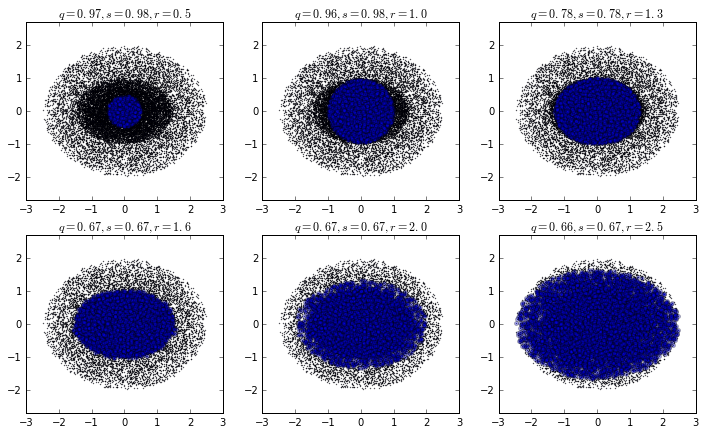

In [61]:
figure(figsize=(12, 7))
title('Shells', fontsize=35)
subplot(2, 3, 1)
title('$q=0.97, s=0.98, r=0.5$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 0.5, 0.1, 1E-3)
axis('equal')
subplot(2, 3, 2)
title('$q=0.96, s=0.98, r=1.0$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 1.0, 0.1, 1E-3)
axis('equal')
subplot(2, 3, 3)
title('$q=0.78, s=0.78, r=1.3$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 1.3, 0.1, 1E-3)
axis('equal')
subplot(2, 3, 4)
title('$q=0.67, s=0.67, r=1.6$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 1.6, 0.1, 1E-3)
axis('equal')
subplot(2, 3, 5)
title('$q=0.67, s=0.67, r=2.0$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 2.0, 0.1, 1E-3)
axis('equal')
subplot(2, 3, 6)
title('$q=0.66, s=0.67, r=2.5$')
scatter(x_sph, y_sph, s=0.1, alpha=1)
reshape(x_sph, y_sph, z_sph, 2.5, 0.3, 1E-3)
axis('equal')


In [81]:
positions = readsnap('../../codes/libraries/halogen/nfw', 'pos','dm')

/usr/local/lib/python2.7/dist-packages/pyGadgetReader-2.6-py2.7.egg/readgadget/modules/header.py:295: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/pyGadgetReader-2.6-py2.7.egg/readgadget/modules/header.py:60: RuntimeWarning: invalid value encountered in double_scalars


MemoryError: 

In [36]:
x = positions[:,0]
y = positions[:,1]
z = positions[:,2]

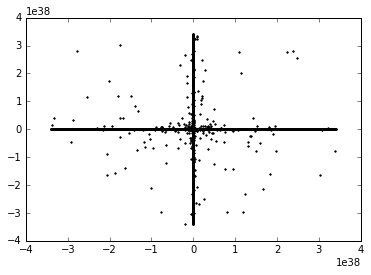

In [37]:
scatter(y, z, s=1)

In [38]:
print len(x)

467166


In [39]:
shape(positions)    

(467166, 3)